In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

# Custom Dataset Class with Labels
class CustomImageDataset(Dataset):
    def __init__(self, images_dir, labels_file, transform=None):
        self.images_dir = images_dir
        self.transform = transform
        self.images_list = os.listdir(images_dir) 

        self.image_paths = sorted([os.path.join(images_dir, img_name) for img_name in self.images_list if img_name[-3:]=='jpg'])
        
        # Load labels from the labels file
        with open(labels_file, 'r') as f:
            self.labels = [int(line.strip()) for line in f.readlines()]

        

        assert len(self.image_paths) == len(self.labels), f"Number of images and labels must match. {len(self.image_paths)} != {len(self.labels)}"

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
transform = transforms.Compose([
    # transforms.Resize((32, 32)),  # Resize images to 32x32
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize images
])

# Load the training dataset
train_dir = '/Users/aimans/Projects/thera/ml_exercise_therapanacea/train_img'  # Update this path to your train dataset
train_labels = '/Users/aimans/Projects/thera/ml_exercise_therapanacea/label_train.txt'  # Update this path to your label file
train_dataset = CustomImageDataset(images_dir=train_dir, labels_file=train_labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)
# Function to unnormalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random images from the training dataset
dataiter = iter(train_loader)
images, labels = next(dataiter)

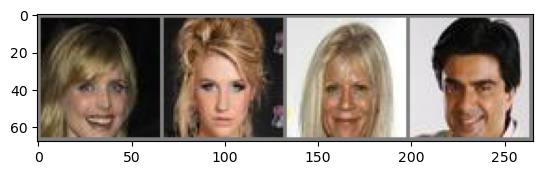

In [9]:
import torchvision

imshow(torchvision.utils.make_grid(images))


In [19]:
# Explore the dataset
def explore_dataset(dataset, dataloader, classes):
    print(f"Total number of images in the dataset: {len(dataset)}")
    print(f"Number of batches: {len(dataloader)}")
    
    class_counts = {classname: 0 for classname in classes}
    
    for _, labels in dataloader:
        print(labels)
        for label in labels:
            print(label)
            class_counts[classes[label]] += 1
    
    print("\nClass distribution in the dataset:")
    for classname, count in class_counts.items():
        print(f"{classname}: {count} images")

# Explore the dataset
print("\nExploring the dataset:")
explore_dataset(train_dataset, train_loader, train_dataset.labels)


Exploring the dataset:
Total number of images in the dataset: 100000
Number of batches: 25000
tensor([1, 1, 0, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 0])
tensor([1, 0, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([0, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 0, 0, 1])
tensor([0, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 0, 1])
tensor([0, 0, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 0, 1])
tensor([0, 1, 1, 1])
tensor([1, 0, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([0, 1, 1, 1])
tensor([1, 1, 1, 0])
tensor([1, 1, 1, 0])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 1, 0])
tensor([1, 1, 1, 0])
tensor([1, 1, 1, 1])
tensor([1, 1, 0, 1])
tensor([1, 1, 0, 0])
te

(array([12102.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 87898.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

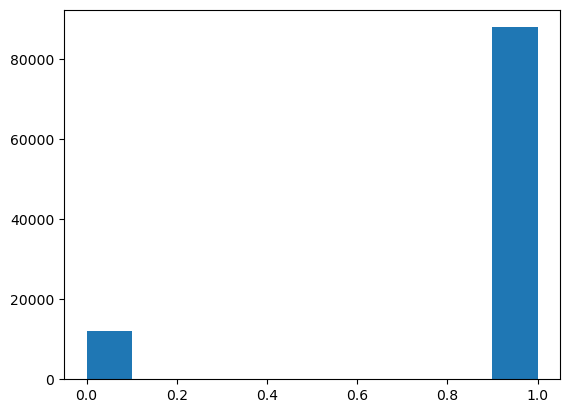

In [18]:
import matplotlib.pyplot as plt
plt.hist(train_dataset.labels)